<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8.3. Deep Learning LSTM</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [1]:
%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb

In [2]:
datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_seg2_standarizado = pd.read_csv('../datos/csv/seg2_stscaler.csv', sep=',')
datosEEG_seg3_standarizado = pd.read_csv('../datos/csv/seg3_stscaler.csv', sep=',')
datosEEG_seg4_standarizado = pd.read_csv('../datos/csv/seg4_stscaler.csv', sep=',')
datosEEG_std_after = pd.read_csv('../datos/csv/all_stscaler_after.csv', sep=',')
datosEEG_std_before = pd.read_csv('../datos/csv/all_stscaler_before.csv', sep=',')


datosEEG_all = [datosEEG_seg1_standarizado, datosEEG_seg2_standarizado, datosEEG_seg3_standarizado, datosEEG_seg4_standarizado, datosEEG_std_after, datosEEG_std_before]
datosEEG_all_nombres = {'segmento_1':datosEEG_seg1_standarizado, 'segmento_2':datosEEG_seg2_standarizado, 'segmento_3':datosEEG_seg3_standarizado,'segmento_4':datosEEG_seg4_standarizado, 'all_std_after':datosEEG_std_after, 'all_std_before':datosEEG_std_before}
nombre_clases = valores_key(datosEEG_seg1_standarizado)


# LSTM (Long short-term memory)

In [3]:

model_lstm = crear_modelo_LSTM(TIMESTEPS, FEATURES, NUM_CLASES)


C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


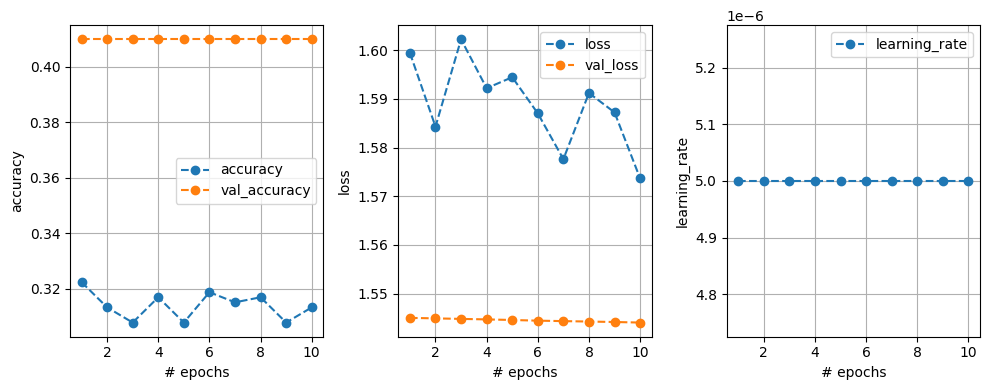

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3020 - loss: 1.5869 - val_accuracy: 0.4098 - val_loss: 1.5441 - learning_rate: 5.0000e-06
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [4]:

accuracy_score_lstm = []
accuracy_score_test_lstm =[]
matriz_confusion_lstm = []
matriz_confusion_test_lstm = []
total_simple_lstm_trained = []

for dataset in datosEEG_all:
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataset)
    
    X_train, X_val, X_test = reshapeo(X_train, X_val, X_test)
            
    # Entrenar el modelo
    model_lstm_trained = model_lstm.fit(X_train, y_train, epochs=50, batch_size=30, validation_data= (X_val, y_val), callbacks=[early_stopping, REDUCE_RL, model_checkpoint, plot_learning])
    
    y_pred = model_lstm.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    y_pred_test = model_lstm.predict(X_test)
    y_pred_classes_test = np.argmax(y_pred_test, axis=1)

    accuracy_score_lstm.append(accuracy_score(y_val, y_pred_classes))
    matriz_confusion_lstm.append(confusion_matrix(y_val, y_pred_classes))
    
    accuracy_score_test_lstm.append(accuracy_score(y_test, y_pred_classes_test))
    matriz_confusion_test_lstm.append(confusion_matrix(y_test, y_pred_classes_test))
    
    #simple_rnn_loss, simple_rnn_accuracy = model_srnn.evaluate(X_test, y_test)
    total_simple_lstm_trained.append(model_lstm_trained)



,LSTM_VAL
Segmento 1,0.333333
Segmento 2,0.266667
Segmento 3,0.388889
Segmento 4,0.166667
All Segmentos after,0.327869
All Segmentos before,0.409836


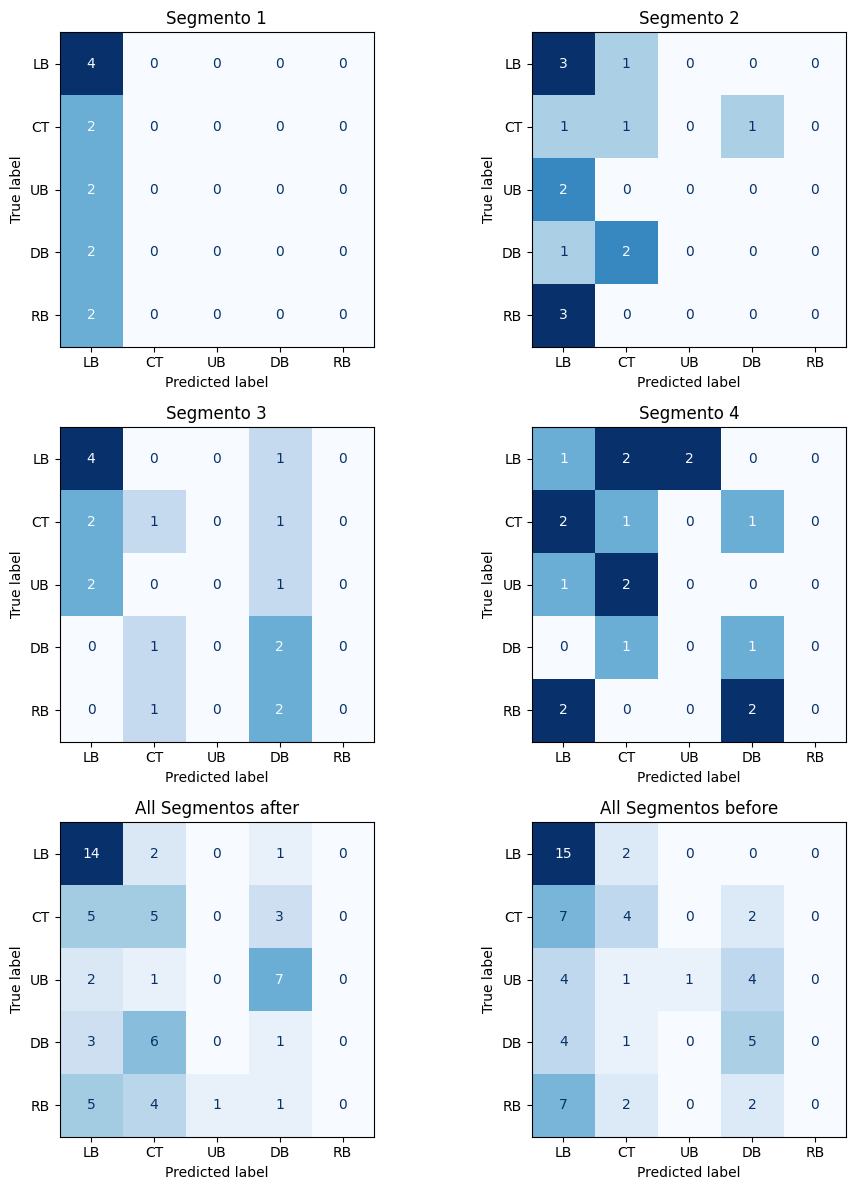

In [5]:
datos_lstm = pd.DataFrame(accuracy_score_lstm, columns=['LSTM_VAL'], index=(titulos_all))

display(datos_lstm)

mc_lstm = []

for matrices_lstm in matriz_confusion_lstm:

    mc_lstm.append(pd.DataFrame(matrices_lstm, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_lstm[0], mc_lstm[1], mc_lstm[2], mc_lstm[3], mc_lstm[4], mc_lstm[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

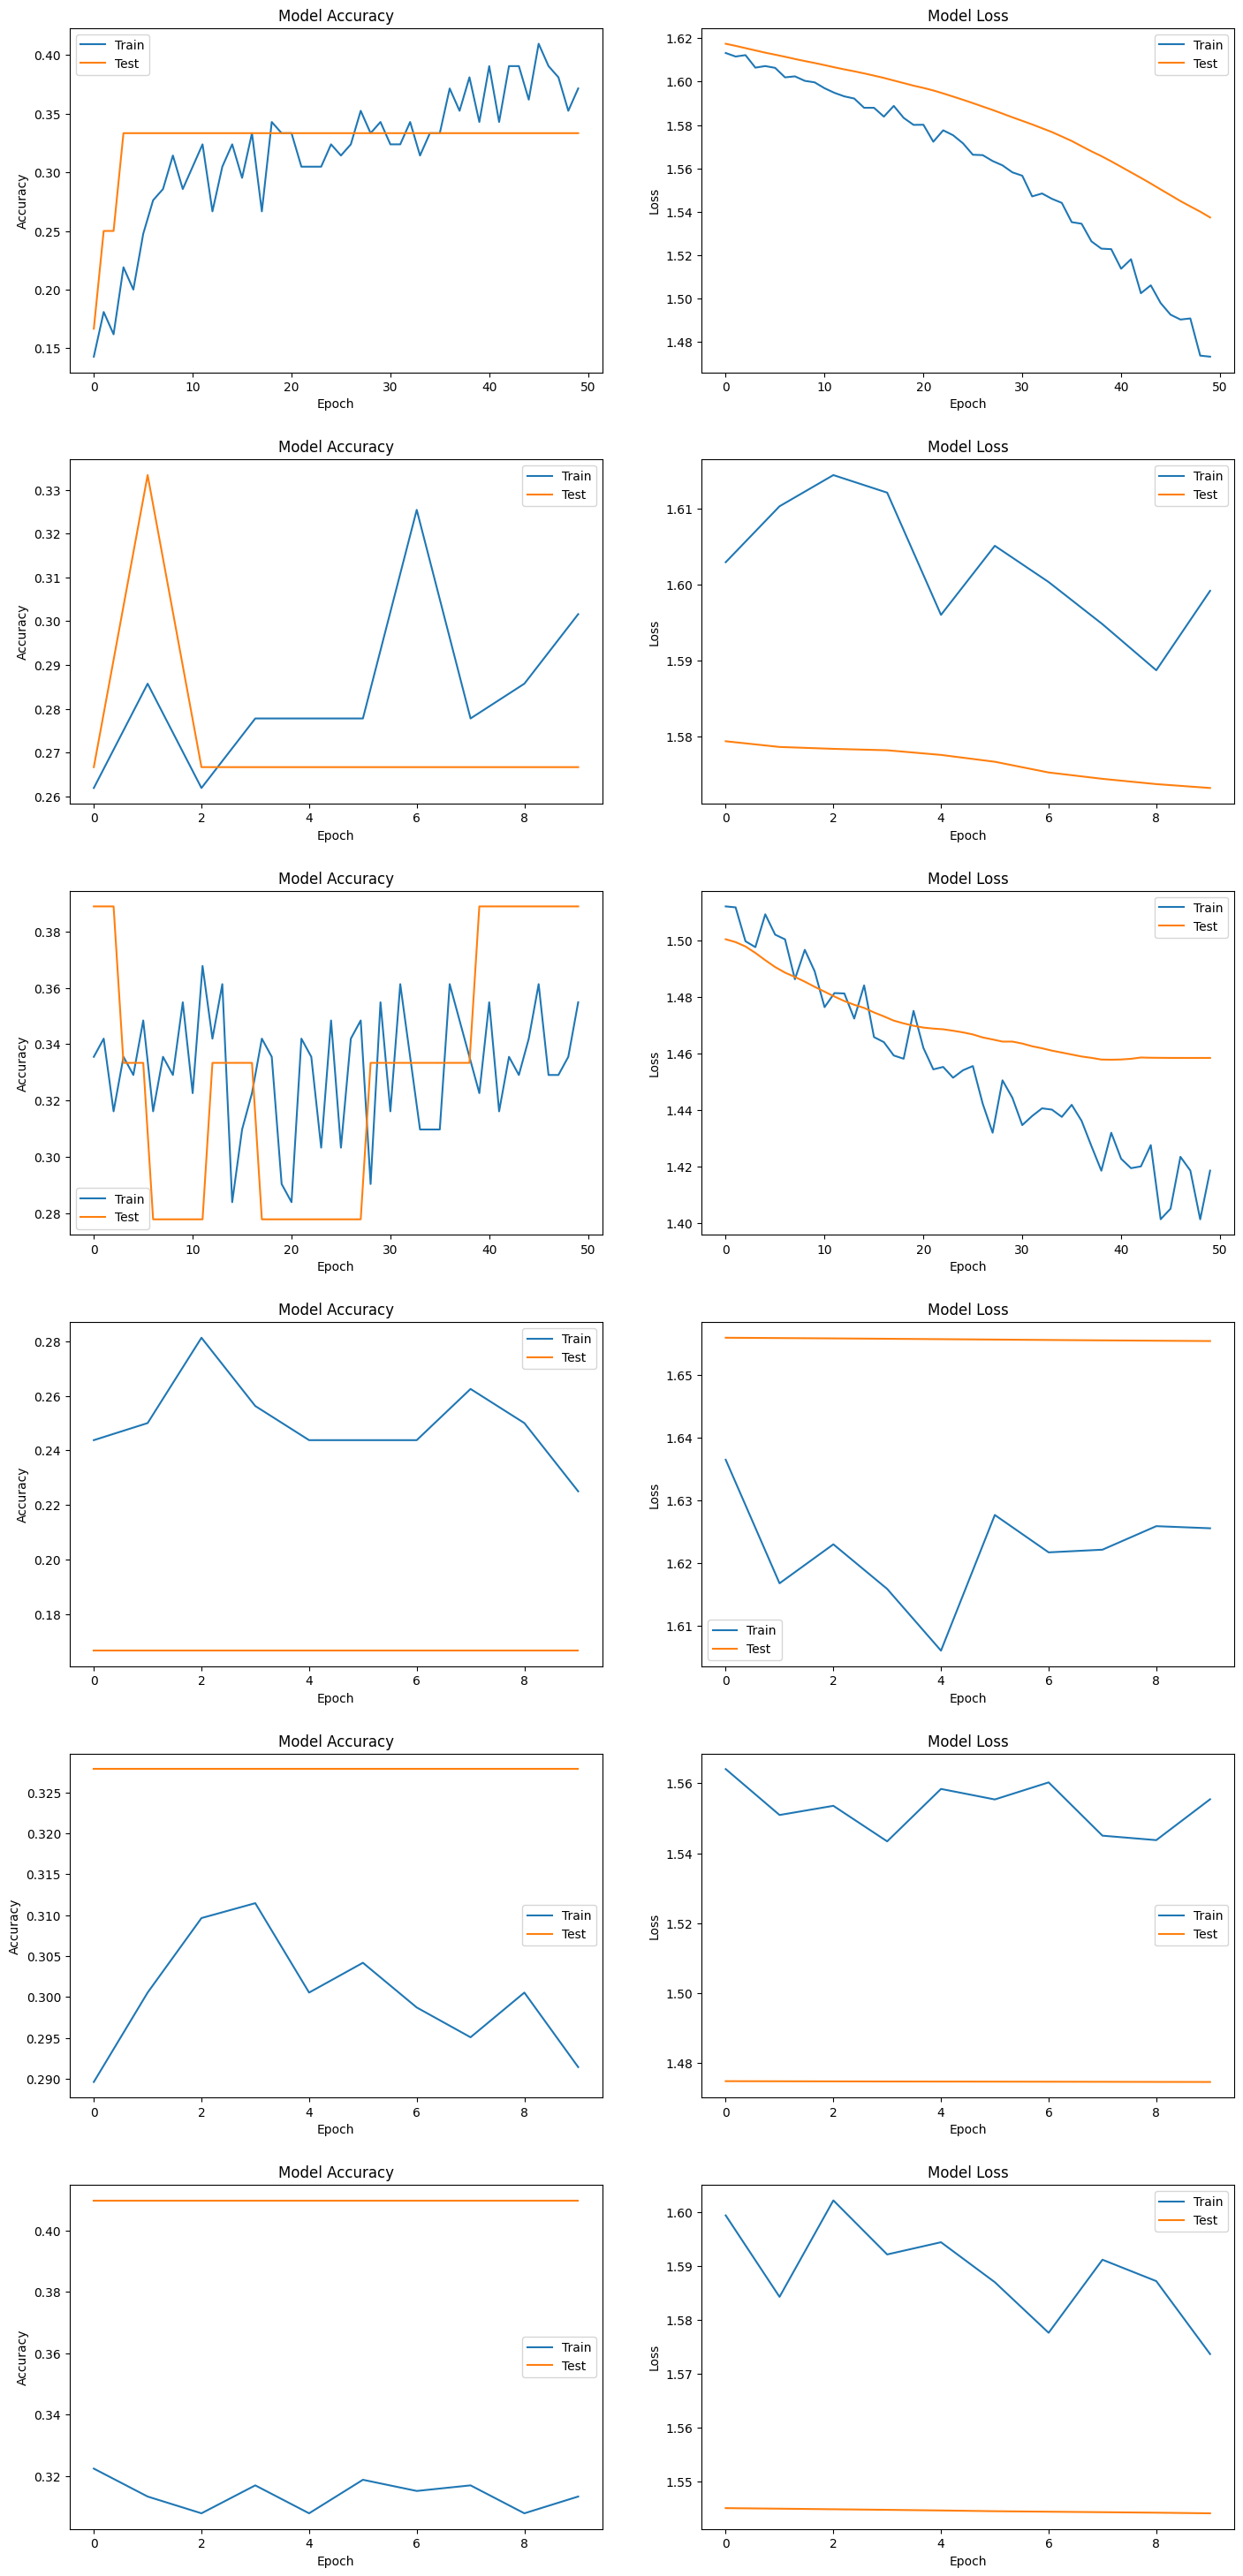

In [9]:


# Crear una figura con 12 subgráficos (6 filas y 2 columnas)
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# Asegurarse de que haya suficiente espacio entre los subgráficos
plt.tight_layout(pad=5.0)

# Alternar entre 'loss' y 'accuracy' para cada par de subgráficos
for idx, history in enumerate(total_simple_lstm_trained[:6]):
    i, j = divmod(idx * 2, 2)
    # Imprimir la gráfica de pérdida en el primer subgráfico del par
    print_chart(axes[i, j], "Model Accuracy", "Epoch", "Accuracy", 
            [history.history['accuracy'], history.history['val_accuracy']], ['Train', 'Val'])
    
    # Imprimir la gráfica de precisión (accuracy) en el segundo subgráfico del par
    i, j = divmod(idx * 2 + 1, 2)
    print_chart(axes[i, j], "Model Loss", "Epoch", "Loss", 
                [history.history['loss'], history.history['val_loss']], ['Train', 'Val'])

# Mostrar todas las gráficas en una sola figura
plt.show()

,LSTM_TEST
Segmento 1,0.384615
Segmento 2,0.312500
Segmento 3,0.350000
Segmento 4,0.350000
All Segmentos after,0.220588
All Segmentos before,0.323529


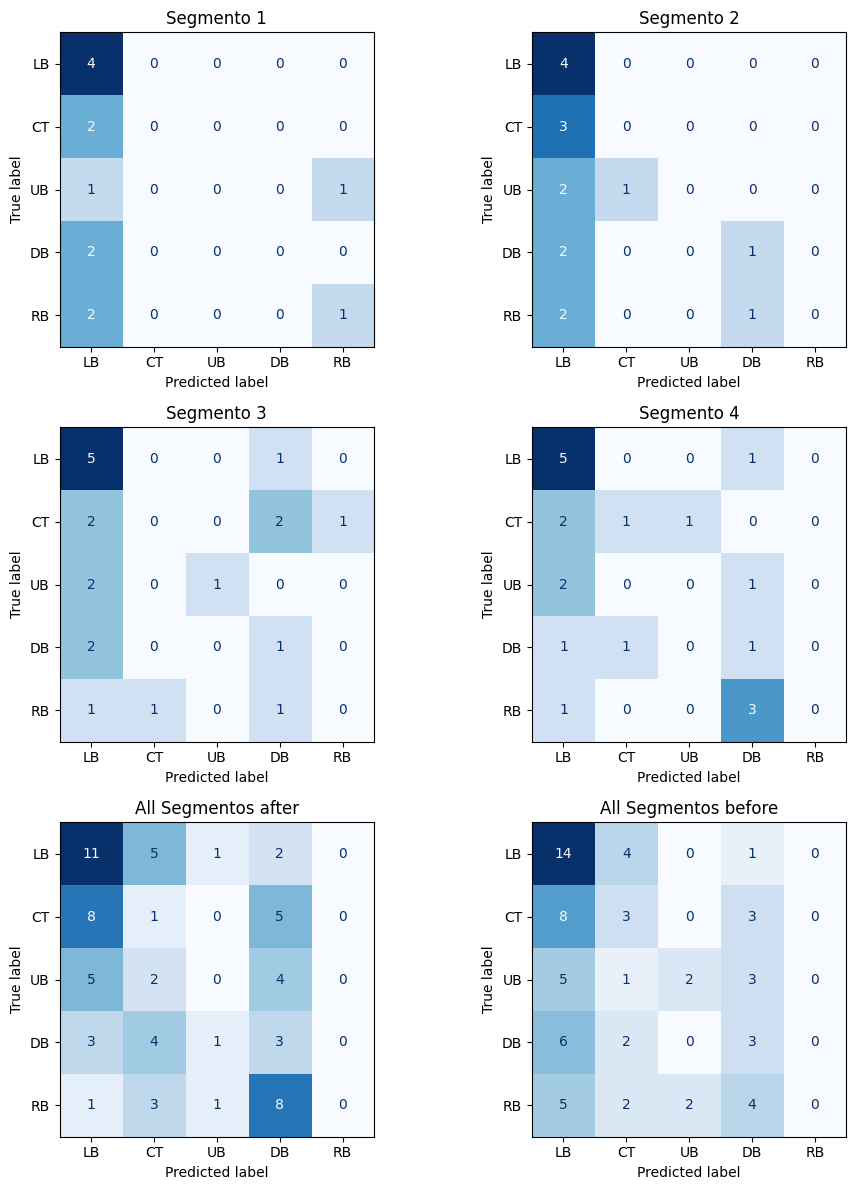

In [7]:
datos_lstm = pd.DataFrame(accuracy_score_test_lstm, columns=['LSTM_TEST'], index=(titulos_all))

display(datos_lstm)

mc_lstm = []

for matrices_lstm in matriz_confusion_test_lstm:

    mc_lstm.append(pd.DataFrame(matrices_lstm, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_lstm[0], mc_lstm[1], mc_lstm[2], mc_lstm[3], mc_lstm[4], mc_lstm[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()